***Title: Literacy Rate vs. Per Capita Income***

***Objective: To explore the relationship between literacy rate and per capita income across Indian states and analyze whether higher literacy levels contribute to economic prosperity.***

***Data Source : Public Government Data (2024 estimates).***

***Tools Used: Python, pandas, matplotlib, Jupyter Notebook.***

***Exploratory Data Analysis***

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
data = pd.read_csv('states data.csv')
data.head(10)

State Per Capita Income   Mortality Rate  \
0  Andaman and Nicobar Islands           2,29,080             5.8   
1               Andhra Pradesh           1,92,587             4.5   
2            Arunachal Pradesh           2,05,645             5.7   
3                        Assam           1,18,504             6.2   
4                        Bihar             47,498             5.4   
5                  Chandirgarh           3,33,932             3.9   
6                 Chhattisgarh           1,20,704             6.3   
7                        Delhi           3,89,529             3.6   
8                          Goa           4,72,070             6.3   
9                      Gujarat           2,41,930             5.6   

            GDP   Birth rate  Life Expectancy Population (2024) Literacy Rate  
0   1,03,705.20          1.3            73.31          3,80,000        86.63%  
1   1,13,38,365          1.7            70.60       5,34,02,000        66.40%  
2   3,51,235.40          1.8            69.87         13,80,000        66.95%  
3  41,26,118.70          1.9            67.90       3,61,59,000        85.90%  
4  65,03,024.30          3.0            69.50      12,92,05,000        70.90%  
5   4,56,352.60          1.4            68.70         12,31,000        86.43%  
6  40,64,158.20          1.8            65.10       3,06,38,000        77.30%  
7  90,46,420.40          1.6            75.80       2,24,00,000        88.70%  
8      8,26,037          1.3            72.59         15,30,000        88.70%  
9    19770664.6          1.9            70.50       7,26,53,000        82.40%

In [3]:
# About the dataset:
print(data.shape)
print()
print(data.columns)
print()
data.info()
print()
print(data.describe())
print()
print(data.isnull())
print()
print(data.size)
print() 

(33, 8)

Index(['State', 'Per Capita Income ', 'Mortality Rate', 'GDP', ' Birth rate',
       'Life Expectancy', 'Population (2024)', 'Literacy Rate'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   State               33 non-null     object 
 1   Per Capita Income   33 non-null     object 
 2   Mortality Rate      33 non-null     float64
 3   GDP                 33 non-null     object 
 4    Birth rate         33 non-null     float64
 5   Life Expectancy     33 non-null     float64
 6   Population (2024)   33 non-null     object 
 7   Literacy Rate       33 non-null     object 
dtypes: float64(3), object(5)
memory usage: 2.2+ KB

       Mortality Rate   Birth rate  Life Expectancy
count       33.000000    33.000000        33.000000
mean         5.621212     1.821212        70.572727
std          1.016968   

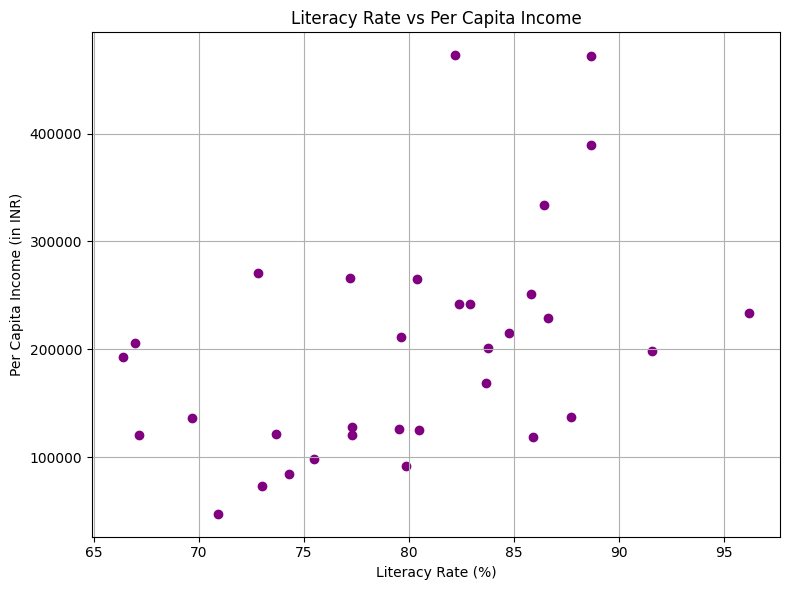

Correlation between Literacy Rate and Per Capita Income: 0.45


In [9]:
# Clean column names (remove leading/trailing spaces)
data.columns = data.columns.str.strip()

# Convert 'Per Capita Income' to numeric (remove commas, spaces, etc.)
data['Per Capita Income'] = data['Per Capita Income'].replace({',': '', ' ': ''}, regex=True)
data['Per Capita Income'] = pd.to_numeric(data['Per Capita Income'], errors='coerce')

# Convert 'Literacy Rate' to numeric (remove % and convert to float)
data['Literacy Rate'] = data['Literacy Rate'].replace({'%': ''}, regex=True)
data['Literacy Rate'] = pd.to_numeric(data['Literacy Rate'], errors='coerce')

# Plotting Scatter plot for Literacy Rate vs Per Capita Income
plt.figure(figsize=(8,6))
plt.scatter(data['Literacy Rate'], data['Per Capita Income'], color='purple')
plt.xlabel('Literacy Rate (%)')
plt.ylabel('Per Capita Income (in INR)')
plt.title('Literacy Rate vs Per Capita Income')
plt.grid(True)
plt.tight_layout()
plt.savefig('Literacy Rate vs Per Capita Income.png', dpi=300, bbox_inches='tight')
plt.show()
correlation = data['Literacy Rate'].corr(data['Per Capita Income'])
print(f"Correlation between Literacy Rate and Per Capita Income: {correlation:.2f}")

In [10]:
# Top 5 states with highest Literacy Rate and Per Capita Income
print("Top 5 states with highest Literacy Rate:")
print(data[['State','Literacy Rate']].sort_values(by='Literacy Rate', ascending=False).head(5))
print("\nTop 5 states with highest Per Capita Income:")
print(data[['State','Per Capita Income']].sort_values(by='Per Capita Income', ascending=False).head(5))

Top 5 states with highest Literacy Rate:
      State  Literacy Rate
15   Kerala          96.20
20  Mizoram          91.58
8       Goa          88.70
7     Delhi          88.70
29  Tripura          87.75

Top 5 states with highest Per Capita Income:
          State  Per Capita Income
26       Sikkim             472543
8           Goa             472070
7         Delhi             389529
5   Chandirgarh             333932
28    Telangana             270839


***Conclusion***

***- The correlation coefficient between Literacy Rate and Per Capita Income is 0.45, indicating a moderate positive relationship.***

***- States like Kerala and Mizoram rank high in literacy but are not the richest suggesting literacy is a factor, but not the only one influencing income.***

***- States with high income (like Sikkim and Goa) may also benefit from other economic drivers such as tourism, administration, or industry.***

***- Overall, improving literacy can support economic growth, but income depends on multiple variables.***